In [1]:
import pickle

#import umap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm.notebook import tqdm
import time
import seaborn as sns
import networkx as nx
from sklearn.metrics import accuracy_score



In [2]:
from google.colab import drive
#@title 1.2 Prepare Folders
#@markdown If you connect your Google Drive, you can save the final image of each run on your drive.

google_drive = True #@param {type:"boolean"}

#@markdown Click here if you'd like to save the diffusion model checkpoint file to (and/or load from) your Google Drive:
yes_please = True #@param {type:"boolean"}

if google_drive is True:
  drive.mount('/content/drive')
  root_path = '/content/drive/MyDrive/Archi_Dataset/Data'
else:
  root_path = '/content'

Mounted at /content/drive


## dimred

In [6]:
root_path = '/content/drive/MyDrive/Archi_Dataset/Data'


pckpath = "/content/drive/MyDrive/Archi_Dataset/Data/PCA_GIN.pickle"

file = open(pckpath,'rb')
pcagin = pickle.load(file)

In [8]:
pckpath = "/content/drive/MyDrive/Archi_Dataset/Data/ICA_GIN.pickle"
file = open(pckpath,'rb')
icagin = pickle.load(file)

In [9]:
pckpath = "/content/drive/MyDrive/Archi_Dataset/Data/RP_GIN.pickle"
file = open(pckpath,'rb')
rpgin = pickle.load(file)

In [26]:
df1 = pd.DataFrame(pcagin[50]['test'],columns=['pca_test_accuracy'])
df2 = pd.DataFrame(icagin[50]['test'],columns=['ica_test_accuracy'])
df3 = pd.DataFrame(rpgin[50]['test'],columns=['rp_test_accuracy'])

In [70]:
f = pd.DataFrame.from_dict(rpgin[50])
f

,time,loss,train,test
0,1342.535117,0.644820,0.867214,0.876003
1,1342.535117,0.465381,0.835735,0.846741
2,1342.535117,0.441035,0.862289,0.868373
3,1342.535117,0.429758,0.859079,0.867996
4,1342.535117,0.426414,0.857905,0.866901
5,1342.535117,0.415873,0.853324,0.863778
6,1342.535117,0.412079,0.861995,0.870222
7,1342.535117,0.404746,0.849861,0.859020
8,1342.535117,0.402083,0.847503,0.857763
9,1342.535117,0.402895,0.864077,0.871264


In [ ]:
df = pd.DataFrame.from_dict(rpgin).T.drop("time",axis=1)
df

In [53]:
dfdim = pd.concat([df1,df2,df3],axis=1)

Text(0.5, 1.0, 'Dimensionality Reduction as Features for GNN accuracy')

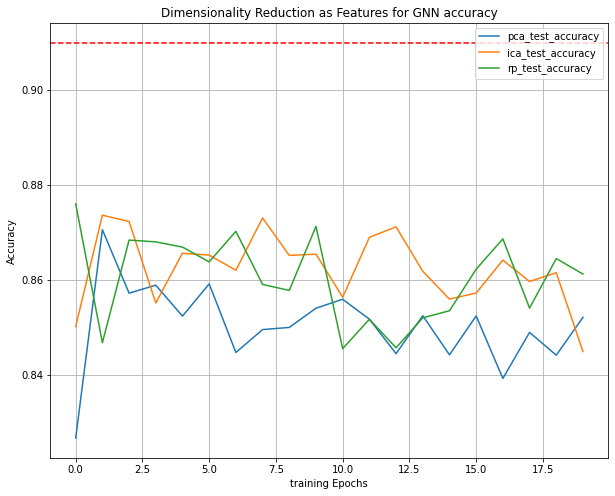

In [72]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
ax = dfdim.plot(grid=True)
ax.axhline(y=.91, color='r', linestyle='--')
ax.set(xlabel='training Epochs', ylabel='Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.title("Dimensionality Reduction as Features for GNN accuracy")

Text(0.5, 1.0, 'Dimensionality Reduction as Features for GNN accuracy')

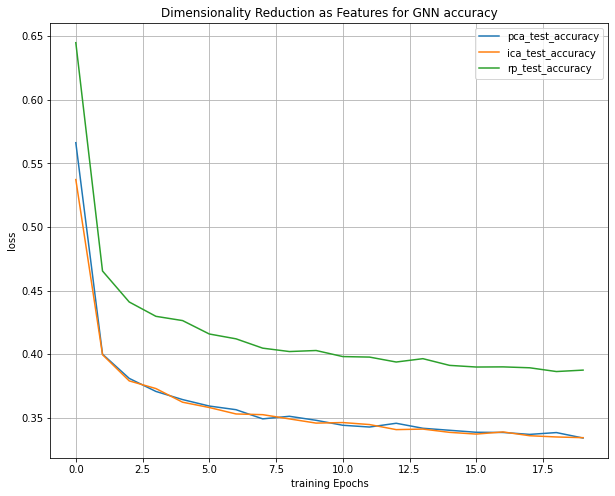

In [75]:
df1 = pd.DataFrame(pcagin[50]['loss'],columns=['pca_test_accuracy'])
df2 = pd.DataFrame(icagin[50]['loss'],columns=['ica_test_accuracy'])
df3 = pd.DataFrame(rpgin[50]['loss'],columns=['rp_test_accuracy'])

dfdimloss = pd.concat([df1,df2,df3],axis=1)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
ax = dfdimloss.plot(grid=True)
#ax.axhline(y=.91, color='r', linestyle='--')
ax.set(xlabel='training Epochs', ylabel='loss')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.title("Dimensionality Reduction as Features for GNN accuracy")

## dimred +cluster

In [11]:
pckpath = "/content/drive/MyDrive/Archi_Dataset/Data/PCAandClusteringNN.pickle"

file = open(pckpath,'rb')
pcac = pickle.load(file)

In [12]:
pckpath = "/content/drive/MyDrive/Archi_Dataset/Data/ICAandClusteringNN.pickle"
file = open(pckpath,'rb')
icac = pickle.load(file)

In [13]:
pckpath = "/content/drive/MyDrive/Archi_Dataset/Data/RPandClusteringNN.pickle"
file = open(pckpath,'rb')
rpc = pickle.load(file)

In [14]:
rpc

defaultdict(dict,
            {50: {'em': defaultdict(dict,
                          {5: {'loss': [0.6310700510425129,
                             0.4627077819287092,
                             0.44202251252771796,
                             0.4270658976045148,
                             0.42179651729676915,
                             0.41398470155124006,
                             0.4081177615571296,
                             0.40721868458150445,
                             0.4011651248424903,
                             0.39987491465162955,
                             0.399182477216611,
                             0.39391391082056637,
                             0.392407546612038,
                             0.3929217031289791,
                             0.39025740805028497,
                             0.38779069894346696,
                             0.38673518615207453,
                             0.38803482569497205,
                             0.38585219

In [82]:
df2 = pd.DataFrame(icac[50]['em'][5]['test'],columns=['em ica_test_accuracy'])
df2

,em ica_test_accuracy
0,0.057789
1,0.057663
2,0.057807
3,0.057771
4,0.057753
5,0.057735
6,0.057878
7,0.057896
8,0.057663
9,0.057717


Text(0.5, 1.0, 'Dimensionality Reduction + EM as Features for GNN accuracy')

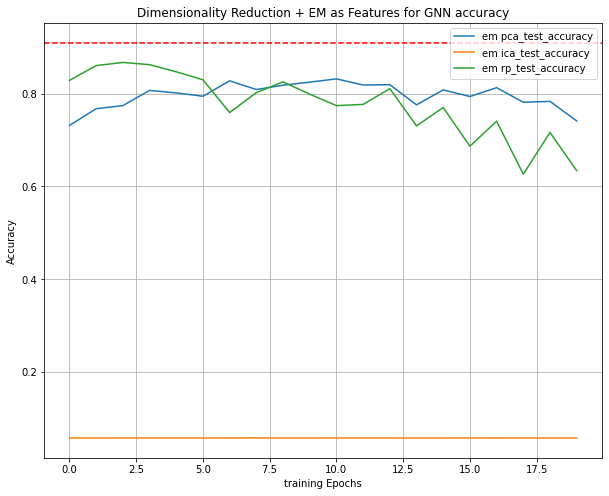

In [86]:
df1 = pd.DataFrame(pcac[50]['em'][5]['test'],columns=['em pca_test_accuracy'])
df2 = pd.DataFrame(icac[50]['em'][5]['test'],columns=['em ica_test_accuracy'])
df3 = pd.DataFrame(rpc[50]['em'][5]['test'],columns=['em rp_test_accuracy'])

dfdim = pd.concat([df1,df2,df3],axis=1)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
ax = dfdim.plot(grid=True)
ax.axhline(y=.91, color='r', linestyle='--')
ax.set(xlabel='training Epochs', ylabel='Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.title("Dimensionality Reduction + EM as Features for GNN accuracy")

Text(0.5, 1.0, 'Dimensionality Reduction + Kmeans as Features for GNN accuracy')

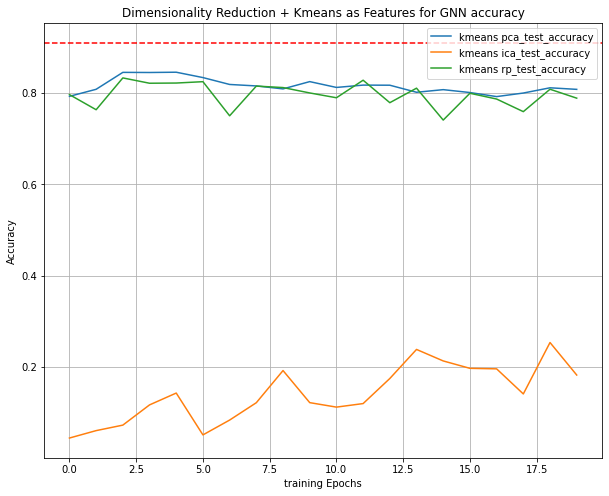

In [87]:
df1 = pd.DataFrame(pcac[50]['kmeans'][5]['test'],columns=['kmeans pca_test_accuracy'])
df2 = pd.DataFrame(icac[50]['kmeans'][5]['test'],columns=['kmeans ica_test_accuracy'])
df3 = pd.DataFrame(rpc[50]['kmeans'][5]['test'],columns=['kmeans rp_test_accuracy'])

dfdim = pd.concat([df1,df2,df3],axis=1)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
ax = dfdim.plot(grid=True)
ax.axhline(y=.91, color='r', linestyle='--')
ax.set(xlabel='training Epochs', ylabel='Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.title("Dimensionality Reduction + Kmeans as Features for GNN accuracy")

Text(0.5, 1.0, 'Dimensionality Reduction + Kmeans as Features for GNN accuracy')

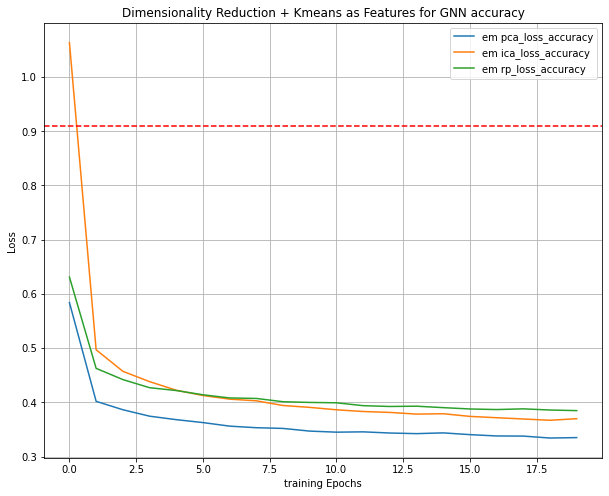

In [93]:
df1 = pd.DataFrame(pcac[50]['em'][5]['loss'],columns=['em pca_loss_accuracy'])
df2 = pd.DataFrame(icac[50]['em'][5]['loss'],columns=['em ica_loss_accuracy'])
df3 = pd.DataFrame(rpc[50]['em'][5]['loss'],columns=['em rp_loss_accuracy'])

dfdim = pd.concat([df1,df2,df3],axis=1)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
ax = dfdim.plot(grid=True)
ax.axhline(y=.91, color='r', linestyle='--')
ax.set(xlabel='training Epochs', ylabel='Loss')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.title("Dimensionality Reduction + Kmeans as Features for GNN accuracy")

Text(0.5, 1.0, 'Dimensionality Reduction + Kmeans as Features for GNN accuracy')

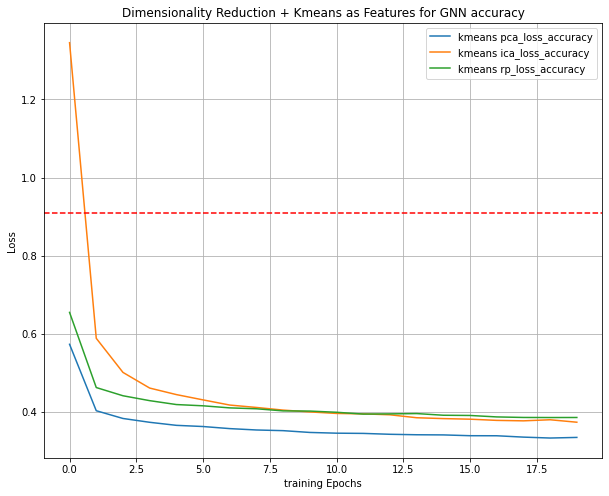

In [92]:
df1 = pd.DataFrame(pcac[50]['kmeans'][5]['loss'],columns=['kmeans pca_loss_accuracy'])
df2 = pd.DataFrame(icac[50]['kmeans'][5]['loss'],columns=['kmeans ica_loss_accuracy'])
df3 = pd.DataFrame(rpc[50]['kmeans'][5]['loss'],columns=['kmeans rp_loss_accuracy'])

dfdim = pd.concat([df1,df2,df3],axis=1)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
ax = dfdim.plot(grid=True)
ax.axhline(y=.91, color='r', linestyle='--')
ax.set(xlabel='training Epochs', ylabel='Loss')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.title("Dimensionality Reduction + Kmeans as Features for GNN accuracy")